# Seaborn

Simplifica la creación de gráficos, soporta DataFrames de `pandas`.

La integración con `matplotlib` no es tan completa.

In [3]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns


sns.set()

/home/fernandezjm/.virtualenvs/prueba/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


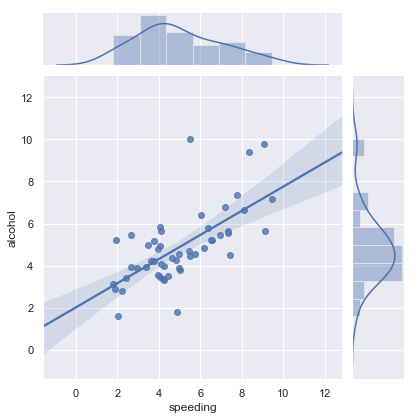

In [11]:
crashes = sns.load_dataset("car_crashes");
sns.jointplot("speeding", "alcohol", crashes, kind='reg');

## Alternativa con `matplotlib`:

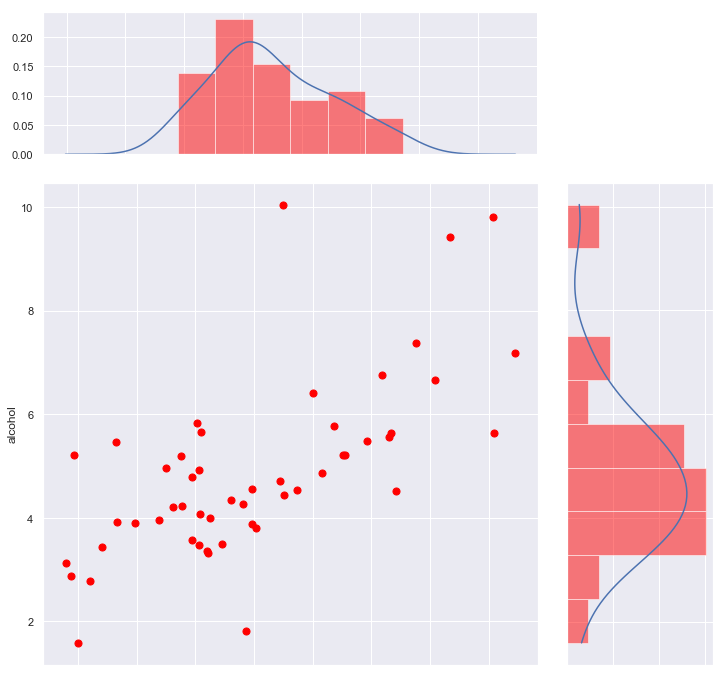

In [14]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

fig = plt.figure(1, figsize=[12, 12])
ax1 = plt.subplot2grid((4, 4), (1, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 4), (0, 0), colspan=3)
ax3 = plt.subplot2grid((4, 4), (1, 3), rowspan=3)

crashes.plot.scatter(x='speeding', y='alcohol', ax=ax1, color='red', s=50)
crashes.plot.kde(y='speeding', ax=ax2, sharex=ax1, legend=None)
crashes.plot.hist(y='speeding', bins=6, ax=ax2, sharex=ax1, density=True, legend=None, alpha=.5, color='red')


ax2.set_ylabel('')
ax2.set_yticks=[]
ax2.set_yticklabels=[]

# No está soportado directamente el rotado en kde
kde_speeding = gaussian_kde(crashes.alcohol)
y = np.linspace(np.amin(crashes.alcohol), np.amax(crashes.alcohol), 100)
ax3.plot(kde_speeding(y), y)
crashes.plot.hist(y='alcohol', ax=ax3, sharey=ax1, normed=True, legend=None, orientation='horizontal', alpha=.5, color='red');


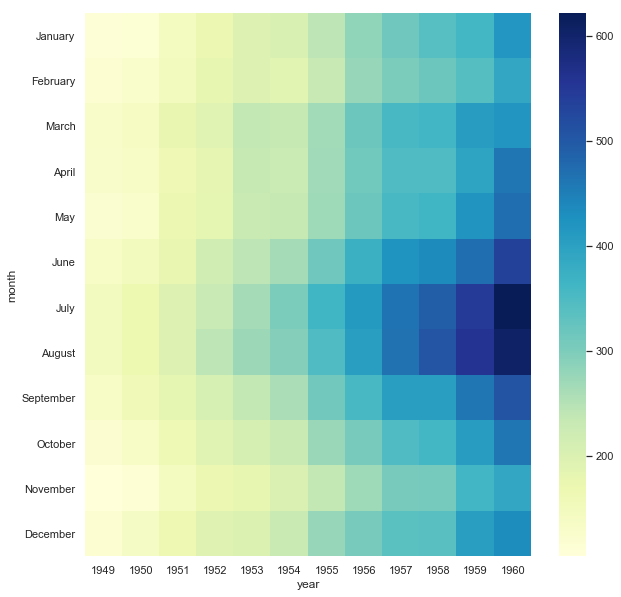

In [17]:
# Heatmaps

df = sns.load_dataset('flights')
flights = df.pivot("month", "year", "passengers")

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(flights,cmap="YlGnBu", ax=ax);

## Datos categóricos

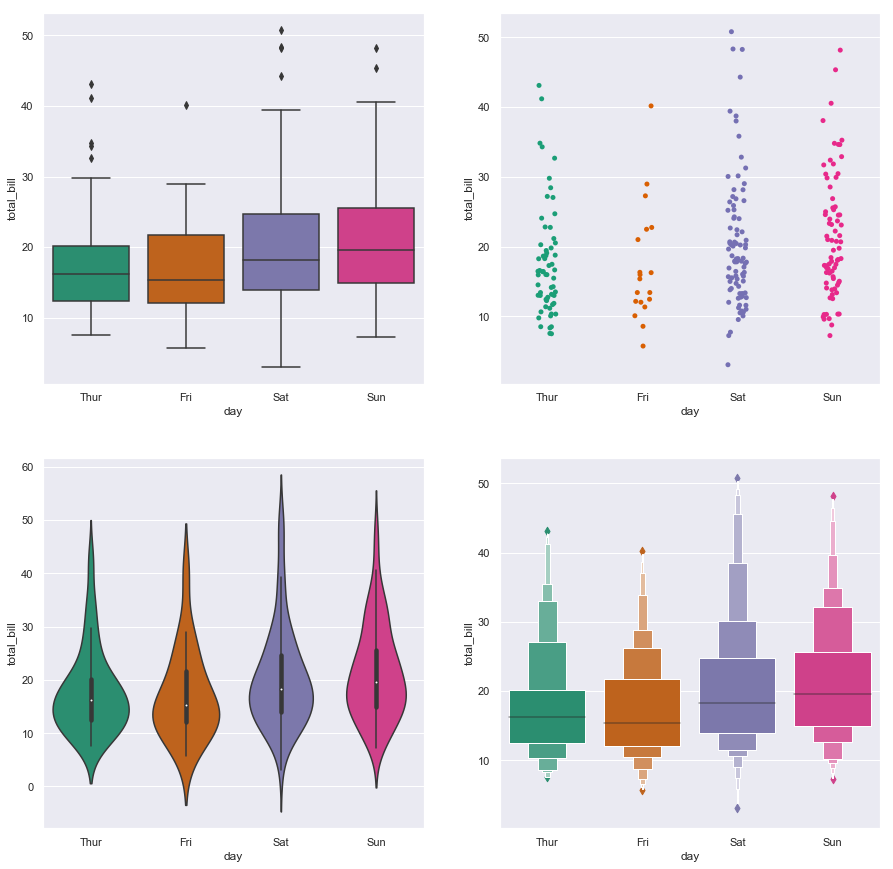

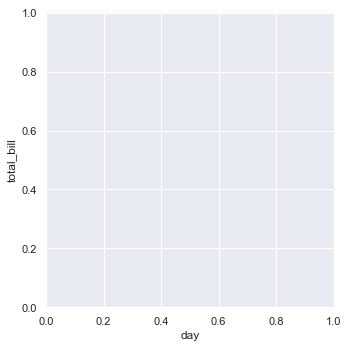

In [54]:
tips = sns.load_dataset("tips")


with sns.color_palette('Dark2'):
    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    sns.boxplot(x="day", y="total_bill", data=tips, ax=ax[0, 0])
    sns.catplot(x="day", y="total_bill", data=tips, ax=ax[0, 1])
    sns.violinplot(x="day", y="total_bill", data=tips, ax=ax[1, 0])
    sns.boxenplot(x="day", y="total_bill", data=tips, ax=ax[1, 1])